In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np      
import statistics as st
import warnings
warnings.filterwarnings('ignore')
print("Imported the required packages")

Imported the required packages


In [2]:
df = pd.read_csv('DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [3]:
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

#### Missing values present:
1. Card_Category
2. Credit_Limit

In [4]:
#### Fixing the NULL values:
mode_value = df["Card_Category"].mode()[0]

# Fill missing values with the mode value
df["Card_Category"].fillna(value=mode_value, inplace=True)

In [5]:
df["Credit_Limit"].fillna(value =df["Credit_Limit"].mean(),inplace = True)

#### Checking the outliers

In [10]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:               
        if df[column].nunique() <= 30:      
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Education_Level           Dependent_count
Marital_Status            Months_on_book
Income_Category           Credit_Limit
Card_Category             Total_Revolving_Bal
Region                    Avg_Open_To_Buy
Total_Relationship_Count  Total_Trans_Amt
Months_Inactive_12_mon    Total_Trans_Ct
Contacts_Count_12_mon     Avg_Utilization_Ratio


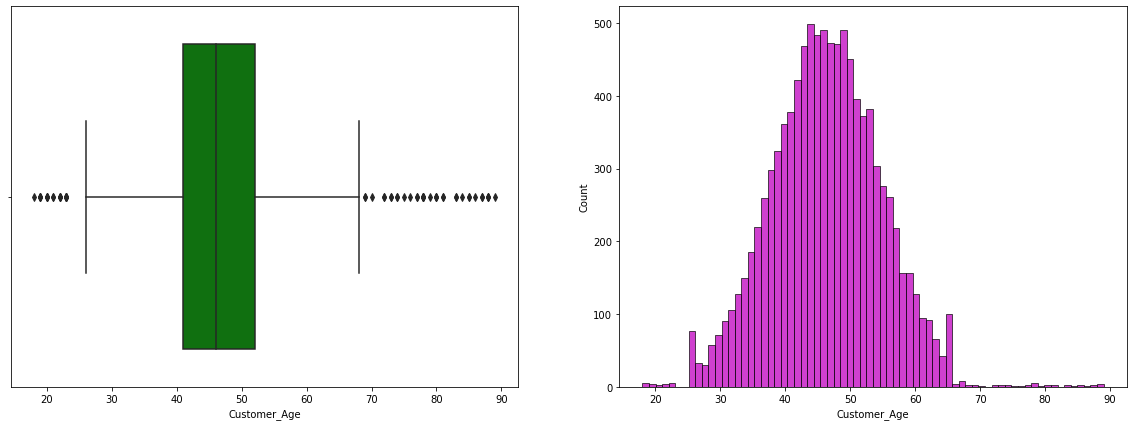

In [11]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Customer_Age"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Customer_Age"], ax = ax[0], color = "g") 
plt.show()

In [16]:
mean = int(df["Customer_Age"].mean())


x = df[(df["Customer_Age"] < 30) | (df["Customer_Age"] > 65)].index

for index in x:
    df.loc[index, "Customer_Age"] = mean

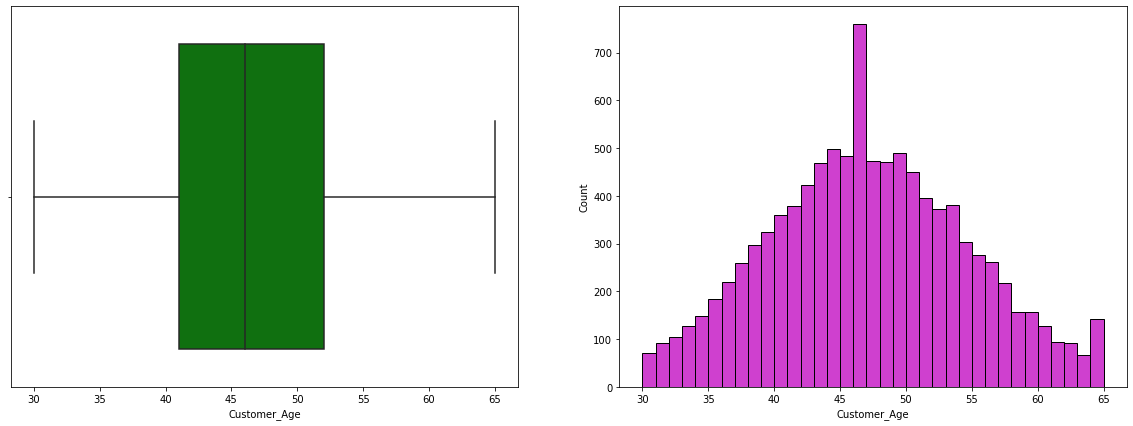

In [17]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Customer_Age"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Customer_Age"], ax = ax[0], color = "g") 
plt.show()

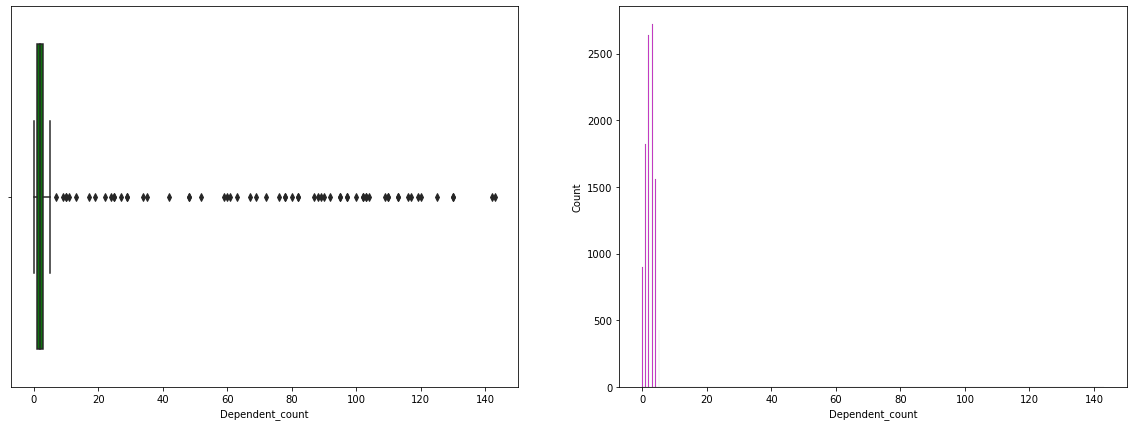

In [20]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Dependent_count"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Dependent_count"], ax = ax[0], color = "g") 
plt.show()

In [69]:
mean = int(df["Dependent_count"].mean())


x = df[(df["Dependent_count"] >15)].index

for index in x:
    df.loc[index, "Dependent_count"] = mean

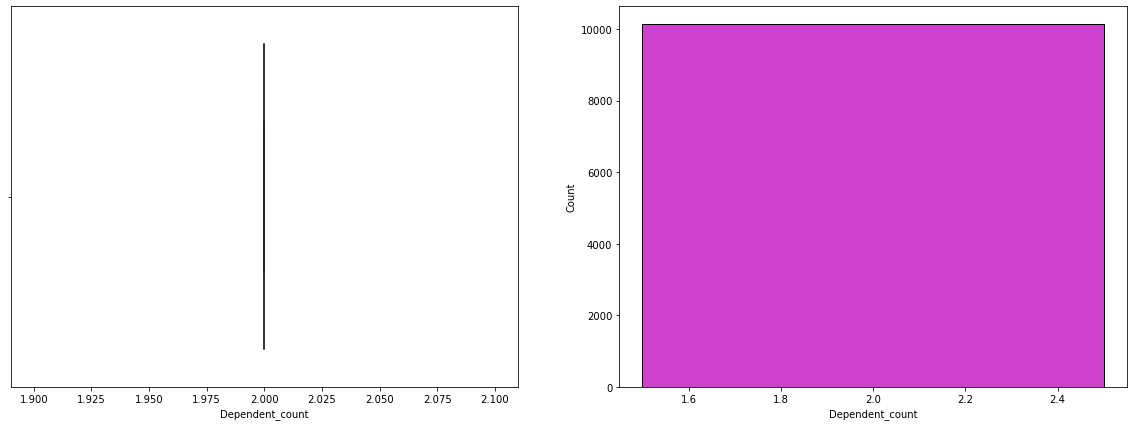

In [70]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Dependent_count"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Dependent_count"], ax = ax[0], color = "g") 
plt.show()

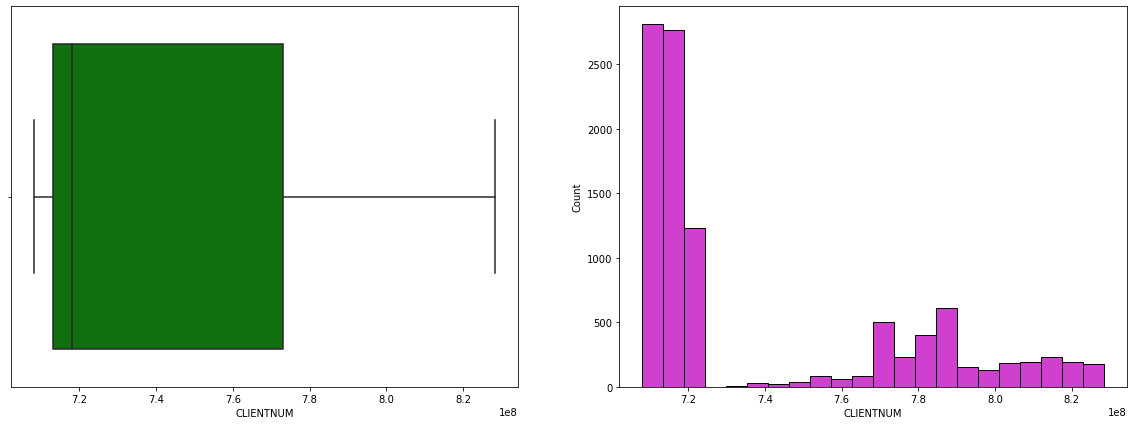

In [27]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["CLIENTNUM"], ax =ax[1], color = "m") 
sns.boxplot(x = df["CLIENTNUM"], ax = ax[0], color = "g") 
plt.show()

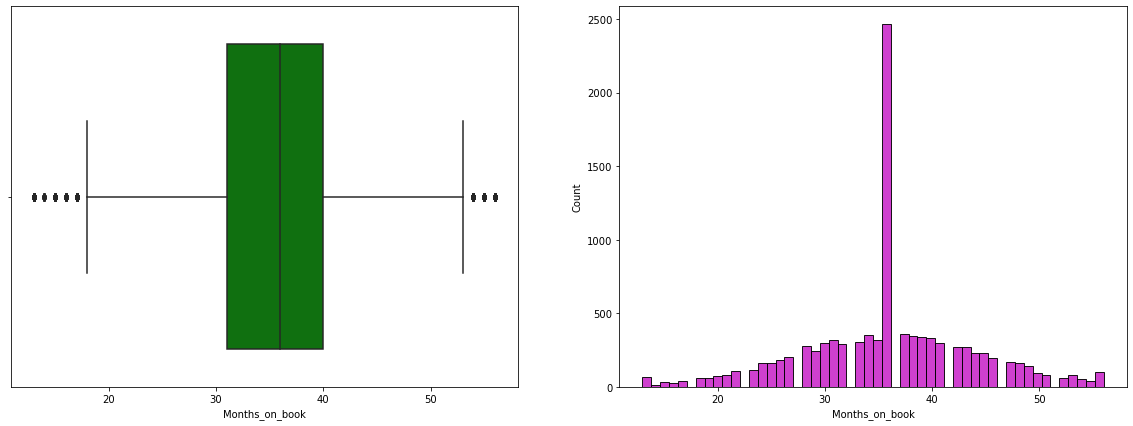

In [28]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Months_on_book"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Months_on_book"], ax = ax[0], color = "g") 
plt.show()

In [33]:
mean = int(df["Months_on_book"].mean())


x = df[(df["Months_on_book"] > 15) | (df["Months_on_book"] < 55)].index

for index in x:
    df.loc[index, "Months_on_book"] = mean

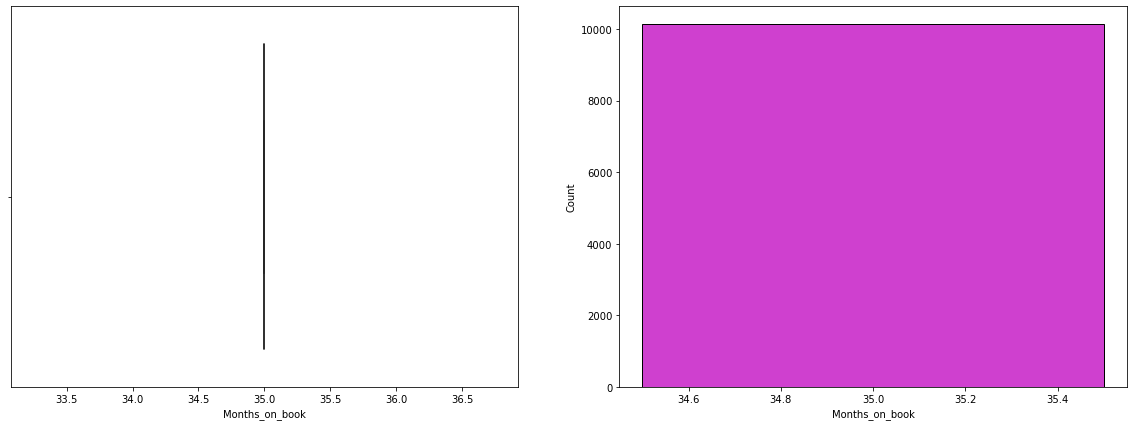

In [34]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Months_on_book"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Months_on_book"], ax = ax[0], color = "g") 
plt.show()

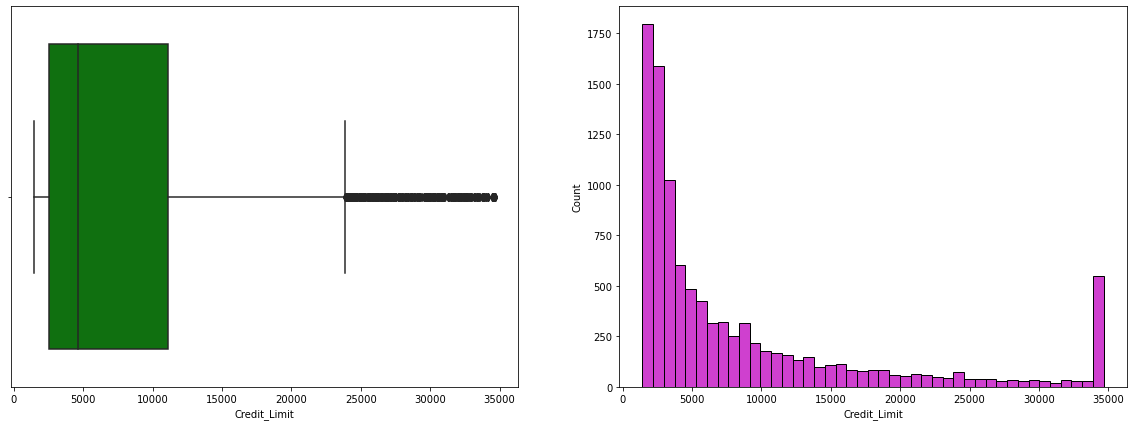

In [35]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Credit_Limit"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Credit_Limit"], ax = ax[0], color = "g") 
plt.show()

In [40]:
mean = int(df["Credit_Limit"].mean())


x = df[(df["Credit_Limit"] > 17000)].index

for index in x:
    df.loc[index, "Credit_Limit"] = mean

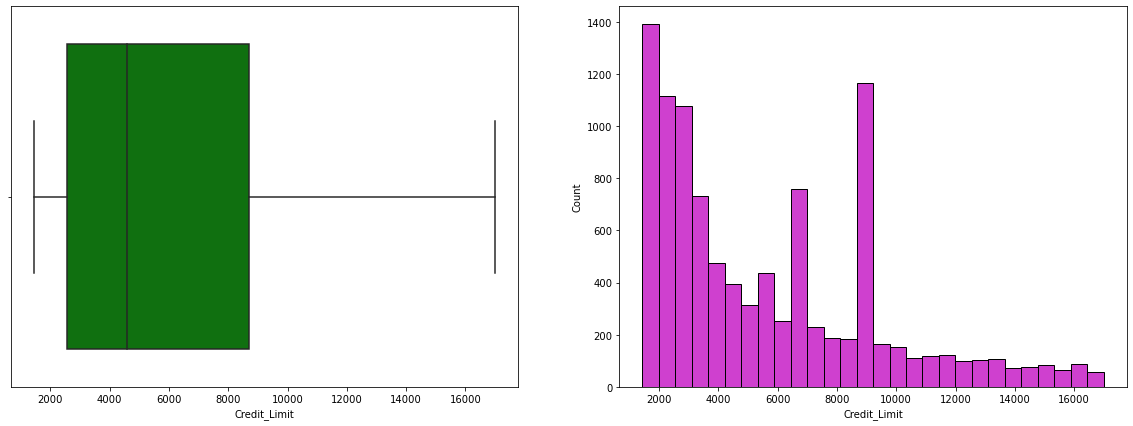

In [41]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Credit_Limit"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Credit_Limit"], ax = ax[0], color = "g") 
plt.show()

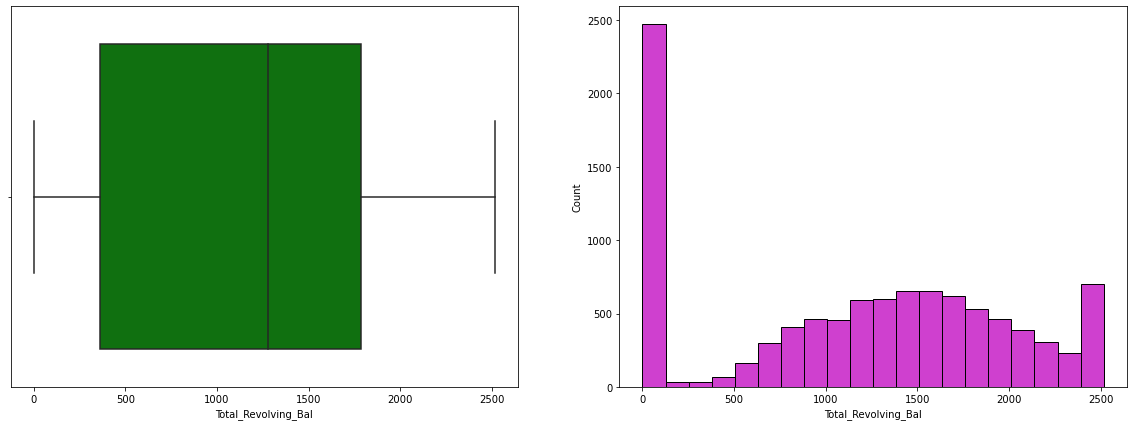

In [42]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Total_Revolving_Bal"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Total_Revolving_Bal"], ax = ax[0], color = "g") 
plt.show()

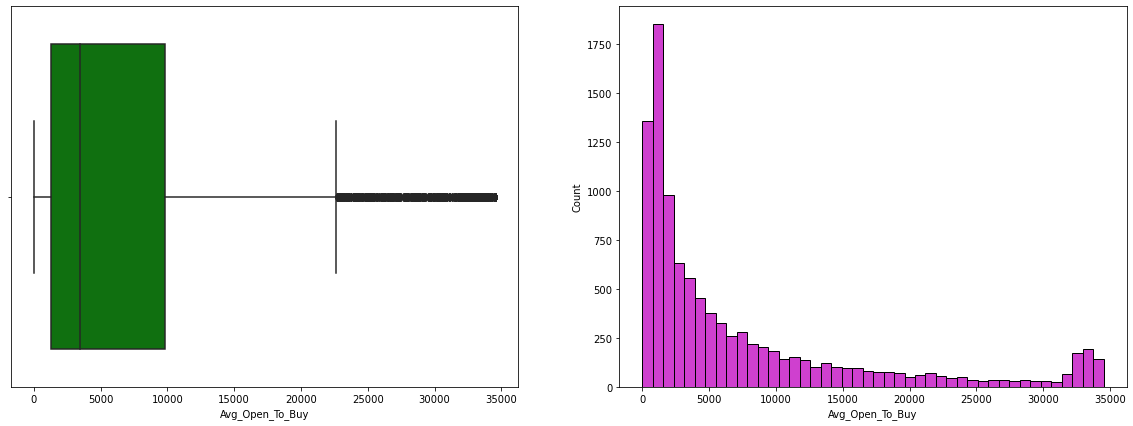

In [43]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Avg_Open_To_Buy"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Avg_Open_To_Buy"], ax = ax[0], color = "g") 
plt.show()

In [50]:
mean = int(df["Avg_Open_To_Buy"].mean())


x = df[(df["Avg_Open_To_Buy"] > 17500)].index

for index in x:
    df.loc[index, "Avg_Open_To_Buy"] = mean

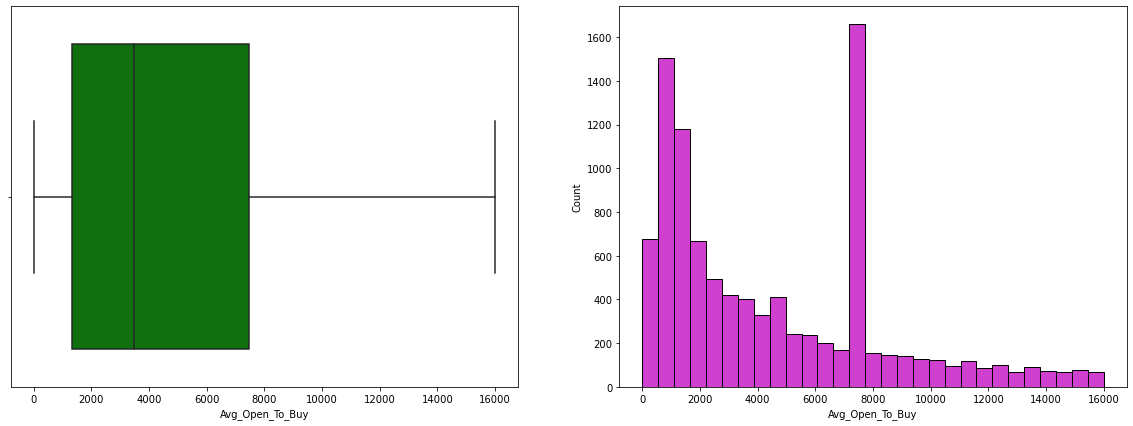

In [51]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Avg_Open_To_Buy"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Avg_Open_To_Buy"], ax = ax[0], color = "g") 
plt.show()

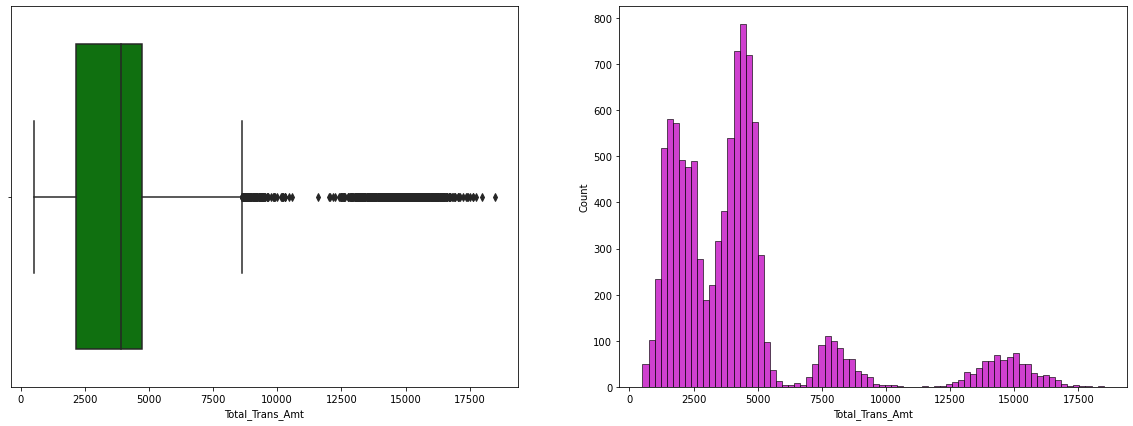

In [53]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Total_Trans_Amt"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Total_Trans_Amt"], ax = ax[0], color = "g") 
plt.show()

In [56]:
mean = int(df["Total_Trans_Amt"].mean())


x = df[(df["Total_Trans_Amt"] > 7500)].index

for index in x:
    df.loc[index, "Total_Trans_Amt"] = mean

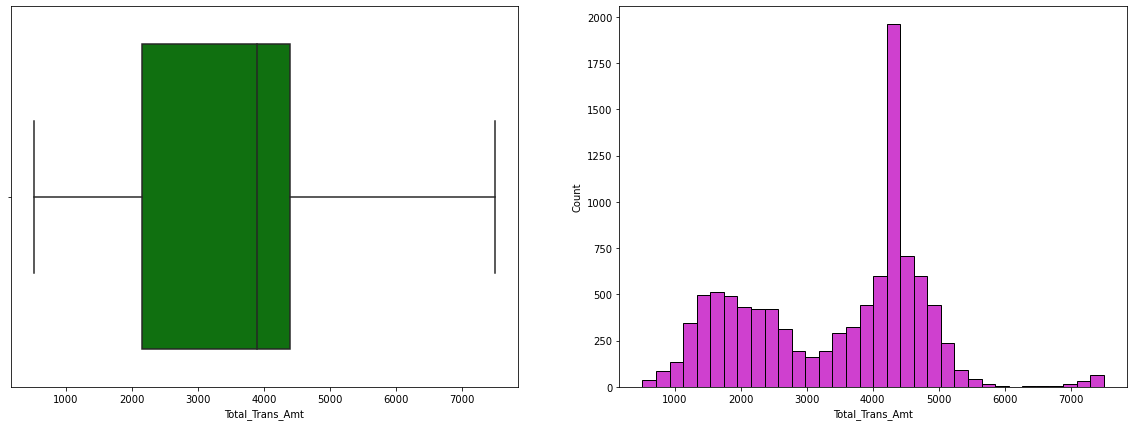

In [57]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Total_Trans_Amt"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Total_Trans_Amt"], ax = ax[0], color = "g") 
plt.show()

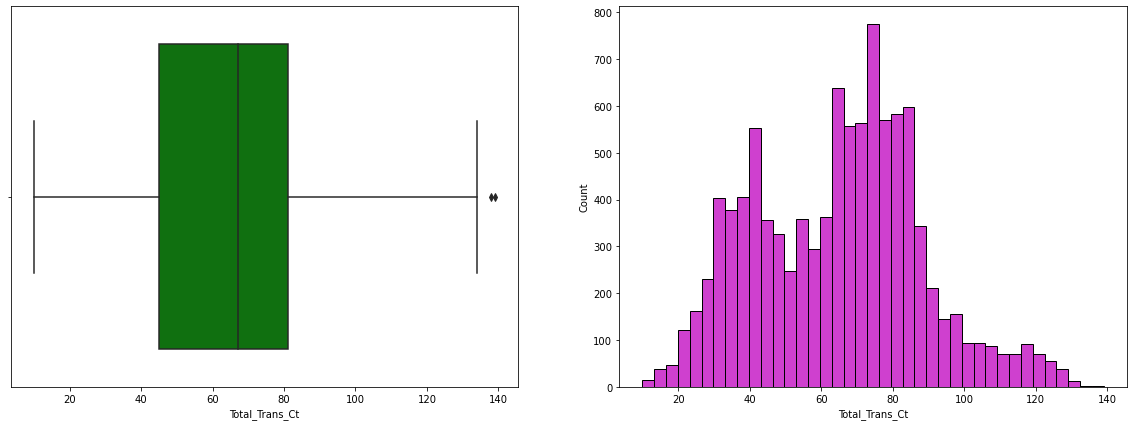

In [58]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Total_Trans_Ct"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Total_Trans_Ct"], ax = ax[0], color = "g") 
plt.show()

In [64]:
mean = int(df["Total_Trans_Ct"].mean())


x = df[(df["Total_Trans_Ct"] > 135)].index

for index in x:
    df.loc[index, "Total_Trans_Ct"] = mean

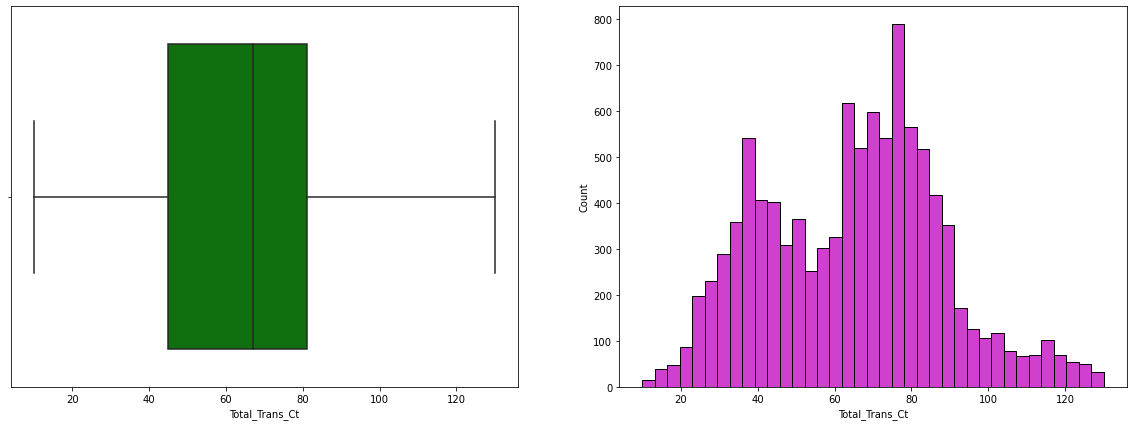

In [65]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Total_Trans_Ct"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Total_Trans_Ct"], ax = ax[0], color = "g") 
plt.show()

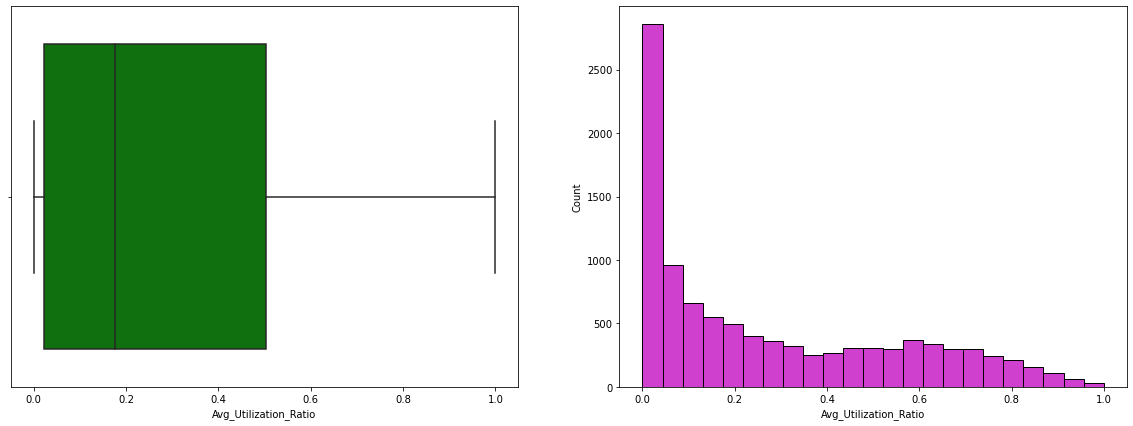

In [66]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["Avg_Utilization_Ratio"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Avg_Utilization_Ratio"], ax = ax[0], color = "g") 
plt.show()

In [67]:
df.to_csv('Bank_Churn_Data.csv', index=False)

In [71]:
import os

# Check if the file exists
file_path = 'Bank_Churn_Data.csv'

if os.path.exists(file_path):
    print(f'The file {file_path} has been successfully saved.')
else:
    print(f'Failed to save {file_path}.')

The file Bank_Churn_Data.csv has been successfully saved.


In [72]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: C:\Users\hp


In [73]:
# Absolute path
absolute_path = '/path/to/your/file.csv'

# Relative path
relative_path = 'Bank_Churn_Data.csv'

In [74]:
import os

notebook_directory = os.path.dirname(os.path.abspath('__file__'))
print("Directory of the Jupyter Notebook:", notebook_directory)

Directory of the Jupyter Notebook: C:\Users\hp


In [75]:
notebook_directory = os.path.dirname(os.path.abspath('__file__'))
file_name = 'Bank_Churn_Data.csv'
file_path = os.path.join(notebook_directory, file_name)
print("Full path to the file:", file_path)

Full path to the file: C:\Users\hp\Bank_Churn_Data.csv
